# Benchmark compiler
This file computes results from benchmark.sh and makes nice plots from them

In [25]:
def process_line(line):
    if "Benchmark for:" in line:
        return {"name": line.rsplit(None, -1)[-1]} # this will break if the hostname contains whitespaces
    if "Benchmark result:" in line:
        return {"linpack": line.rsplit(None, -1)[-2]} # returns the number of kflops linpack found
    if "Memsweep time in seconds:" in line:
        return {"memsweep": line.rsplit(None, -1)[-1]} # returns the number of seconds memsweep took 

In [26]:
import glob

resultfiles = glob.glob("results*.txt")
               
results = []

for resultfile in resultfiles:
    
    testresults = {}  
    
    with open(resultfile) as fp:

        for line in fp:
            
            values = process_line(line)
            if values != None:
                testresults.update(values)
                
        
            
    results.append(testresults)
print(results)
 


[{'name': 'pepperT440PManjaro', 'linpack': '2668999.554', 'memsweep': '4.848'}, {'name': 'pepperT440PManjaro', 'linpack': '2778840.063', 'memsweep': '4.513'}]


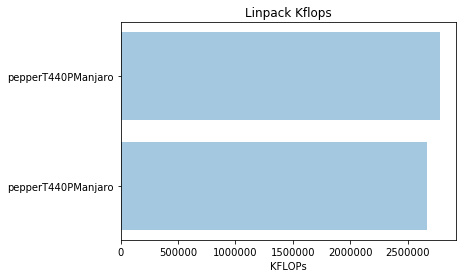

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#todo use results to plot charts that display differences in the machines.


machines = ([d["name"] for d in results if "name" in d])
linpack = ([d["linpack"] for d in results if "linpack" in d])
linpack = list(map(float, linpack))
memsweep = ([d["memsweep"] for d in results if "memsweep" in d])
memsweep = list(map(float, memsweep))



#plt.figure(0)

y_pos = np.arange(len(machines))

plt.barh(y_pos, linpack, align='center', alpha=0.4)

plt.yticks(y_pos, machines)
plt.xlabel('KFLOPs')
plt.title('Linpack Kflops')

plt.hist(y_pos, linpack)

plt.show()

In [24]:
linpack_figure.barh(y_pos, linpack, align='center', color='green', ecolor='black')
linpack_figure.set_yticks(y_pos)
linpack_figure.set_yticklabels(machines)
linpack_figure.invert_yaxis()  # labels read top-to-bottom
linpack_figure.set_xlabel('KFLOPs')
linpack_figure.set_title('Linpack per machine')

plt.figure()
y_pos = np.arange(len(machines))

ax.barh(y_pos, memsweep, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(machines)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('memsweep')
ax.set_title('Linpack per machine')

plt.show()

AttributeError: 'Figure' object has no attribute 'barh'